<a href="https://colab.research.google.com/github/TahaRazzaq/Discovering-customer-behavior-Dynamics/blob/CFSFDP-Algorithm/Copy_of_Connecting_Precon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Precon Dataset
<div align="justify">
PRECON dataset is the first attempt to collect extensive residential energy consumption information from South Asia in particular Pakistan, and hence is being used in understanding important facts about the energy market.

The dataset contains information about **42 distinct households** with their energy consumption being recorded at **minutes granularity**. On average, each household has **52,5600 data values** which encapsulate the **data collected over a year**. The data of each household varies significantly due to the different heavy energy consuming loads (like ACs), however the date/time and usage column is same over the entire dataset, hence they are used for major computations. 

## Basic Exploratory Data Analysis
<div align="justify">
The basic EDA involved locating and replacing null values. The initial search showed that only the usage column had null values, which were replaced using the forward fill mechanism. Using the forward fill seems logical since, the possible reason for null values can be load shedding and hence assuming that similar load will maintained for the next few minutes is reasonable. 
 
#Trends in the Data:
<div align="justify">
In order to understand the trend of the energy consumption, the data is grouped with respect to the months and the line graph shows the trend. 

![link text](https://drive.google.com/uc?id=1LD_w4Hh9KClGXQZgjeBnyjvpcu_KY5An)
 
<div align="justify">
The trend makes sense intuitively as well since the energy consumption increases in the hotter months with the air conditioners and other appliances being used frequently. As compared to these months, the relatively cooler time of the year has a considerable lower energy consumption. This graph is in full correspondence with the graph depicting the average usage of the consumers with respect to the seasons. 
 
![link text](https://drive.google.com/uc?id=1kFHqoTfmcG1rOZTRll9zH_RSyJnFXAvL)

<div align="justify">
Moreover, these trends are not only true for the average consumption of all the users but they also occur at the individual level. Each consumer shows similar energy consumption behavior.
 
![link text](https://drive.google.com/uc?id=1SWHyf9SvSZIB9vn26QOzjYegfcQqz21b)
 
<div align="justify">
In order to encapsulate the overall statistics about the usage of the consumers, we use boxplot. The boxplot very closely captures the spread along with the other statistics of the feature.
 
![link text](https://drive.google.com/uc?id=1JJjP1kwUqATxvbAp9GaRPERDBQ4mSfjw)
 
<div align="justify">
The next section of the notebook is divided in 2 sections - file reading and cleaning, Graphs - each containing the code and implementation of the respective part. 

 </div>
 
 



# Code

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import datetime
from datetime import timedelta
import sys
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from IPython.display import clear_output
from scipy.special import rel_entr
import matplotlib.cm as cm
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# hlist = ['ID','Datetime','Energy']
df = pd.read_csv("/content/drive/MyDrive/Summer Work and SPROJ/Precon/PRECON(Unzipped Files)/House41.csv",sep=",")
df['Date_Time'] = df['Date_Time'].apply(pd.Timestamp)
df.head()

,Date_Time,Usage_kW
0,2018-06-01 00:00:00,0.7781
1,2018-06-01 00:01:00,0.7809
2,2018-06-01 00:02:00,0.7718
3,2018-06-01 00:03:00,0.7647
4,2018-06-01 00:04:00,0.7638


In [ ]:
!gdown --id 1QkWEUzzjZPsoykBRhiFb6RWlo3s-Hea4
!unzip -q "PRECON.zip" -d ""

Downloading...
From: https://drive.google.com/uc?id=1QkWEUzzjZPsoykBRhiFb6RWlo3s-Hea4
To: /content/PRECON.zip
187MB [00:05, 32.1MB/s]


## Dask implementation

In [ ]:
# conda install dask                     # either conda install
!python -m pip install dask[dataframe]

In [ ]:
import dask.dataframe as dd
df = dd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Precon_combined.csv')


In [ ]:
df.ID.compute()

In [ ]:
df[df['ID']=='House19'].compute()

In [ ]:
d_id = df['ID'].compute()

In [ ]:
d_id.sort_values()

In [ ]:
df = df.compute()

In [ ]:
df.shape

## File Reading and cleaning

In [ ]:
path = r'/content' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:

    df = pd.read_csv(filename,sep=",", usecols = ['Date_Time','Usage_kW'])
    df['ID'] = filename.split('/')[-1][:-4]

    li.append(df)
    # print(filename,li)
    # break

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
# frame.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Precon_shortened.csv')
# # Copy of Connecting_Precon.ipynb

In [ ]:
frame.head()

,Date_Time,Usage_kW,ID
0,2018-06-01 00:00:00,3.6729,House31
1,2018-06-01 00:01:00,3.6762,House31
2,2018-06-01 00:02:00,3.6814,House31
3,2018-06-01 00:03:00,3.6780,House31
4,2018-06-01 00:04:00,3.6530,House31


In [ ]:
frame['IDs'] = frame['ID'].apply(lambda x:x[-1]  if len(x) == 6 else x[-2:])
frame['IDs'] = frame['IDs'].astype(int)


df = frame[['IDs','Date_Time','Usage_kW']]
df['Date_Time'] = df['Date_Time'].apply(pd.Timestamp)


null_columns = df.columns[df.isnull().any()]    # Finding columns which contain null values
df[null_columns].isnull().sum()
# df['Usage_kW'].fillna(0,inplace=True)
df['Usage_kW'].ffill(inplace = True)
# df['Usage_kW'] = df['Usage_kW'].fillna(df['Usage_kW'].rolling(3,min_periods=1).mean(), inplace = True)
# rolling(6,min_periods=1).mean())
df['IDs'] = df['IDs'].astype('category')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,IDs,Date_Time,Usage_kW
0,31,2018-06-01 00:00:00,3.6729
1,31,2018-06-01 00:01:00,3.6762
2,31,2018-06-01 00:02:00,3.6814
3,31,2018-06-01 00:03:00,3.6780
4,31,2018-06-01 00:04:00,3.6530


In [ ]:
null_columns = df.columns[df.isnull().any()]    # Finding columns which contain null values
df[null_columns].isnull().sum()


Series([], dtype: float64)

In [ ]:
# df.iloc[1360801]

In [ ]:
print('Number of houses',len(list(df['IDs'].unique())))
df['IDs'].value_counts()

Number of houses 42


30    740160
42    525600
12    525600
19    525600
18    525600
17    525600
16    525600
15    525600
14    525600
13    525600
11    525600
41    525600
10    525600
9     525600
8     525600
7     525600
5     525600
4     525600
3     525600
2     525600
20    525600
21    525600
22    525600
32    525600
40    525600
39    525600
37    525600
36    525600
34    525600
23    525600
33    525600
31    525600
29    525600
28    525600
27    525600
26    525600
25    525600
24    525600
35    524161
1     462240
38    364320
6     286560
Name: IDs, dtype: int64

In [ ]:
df['Month'] = df['Date_Time'].dt.month
# df['Month'] = df.apply(
#     lambda row: '{:%b}'.format(datetime.strptime(str(row['month']), '%m')),
#     axis=1
# ) 
df.head()

,IDs,Date_Time,Usage_kW,Month
0,31,2018-06-01 00:00:00,3.6729,6
1,31,2018-06-01 00:01:00,3.6762,6
2,31,2018-06-01 00:02:00,3.6814,6
3,31,2018-06-01 00:03:00,3.6780,6
4,31,2018-06-01 00:04:00,3.6530,6


In [ ]:
# df['Month'] = pd.to_datetime(df['Date_Time'], format='%m').dt.month_name().str.slice(stop=3)

## Graphs

In [ ]:
from matplotlib.dates import DateFormatter

Text(0, 0.5, 'Consumption (kW)')

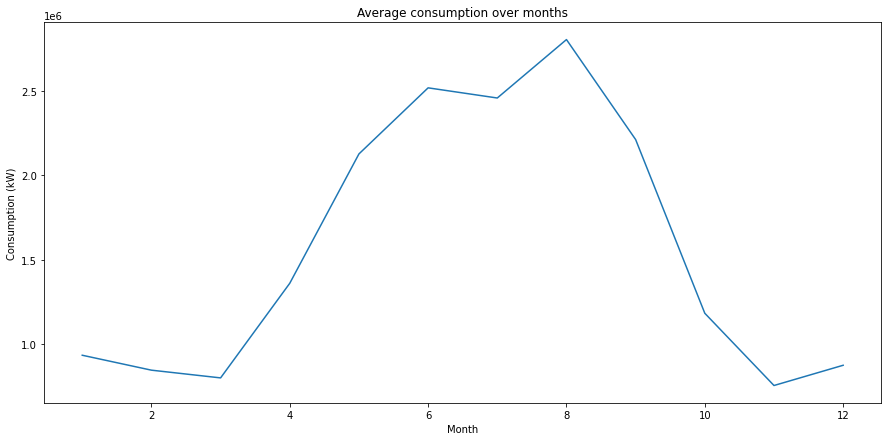

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Month']).sum()['Usage_kW'].plot(ax=ax)
# date_form = DateFormatter("%b")
# ax.xaxis.set_major_formatter(date_form)
ax.set_title('Average consumption over months')
ax.set_ylabel('Consumption (kW)')

In [ ]:

# fig, ax = plt.subplots(figsize=(20,20))
# df.groupby(['Month','IDs']).sum()['Usage_kW'].unstack().plot(ax=ax)
# ax.legend(bbox_to_anchor=(1,0), loc="best", ncol=42,handleheight=2.4, labelspacing=0.05)


In [ ]:

ids = set(list((df['IDs'].unique())))

fig = go.Figure()
for i in ids: 
  data = df[df['IDs']==i]
  x=data.groupby(['Month'])['Usage_kW'].sum()
  
  fig.add_trace(go.Scatter(x=x.index, y=x.values,
                      mode='lines',
                      name='ID'+str(i)))

fig.update_layout(
    title="Usage vs Months for each consumer",
    xaxis_title="Months",
    yaxis_title="Usage (kW)",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show()


In [ ]:
df_temp = frame[['IDs','Date_Time','Usage_kW']]
df_temp['Date_Time'] = df_temp['Date_Time'].apply(pd.Timestamp)


# null_columns = df_temp.columns[df_temp.isnull().any()]    # Finding columns which contain null values
# df_temp[null_columns].isnull().sum()
# df_temp['Usage_kW'].fillna(0,inplace=True)

df_temp['IDs'] = df_temp['IDs'].astype('category')
df_temp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IDs,Date_Time,Usage_kW
0,31,2018-06-01 00:00:00,3.6729
1,31,2018-06-01 00:01:00,3.6762
2,31,2018-06-01 00:02:00,3.6814
3,31,2018-06-01 00:03:00,3.6780
4,31,2018-06-01 00:04:00,3.6530


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



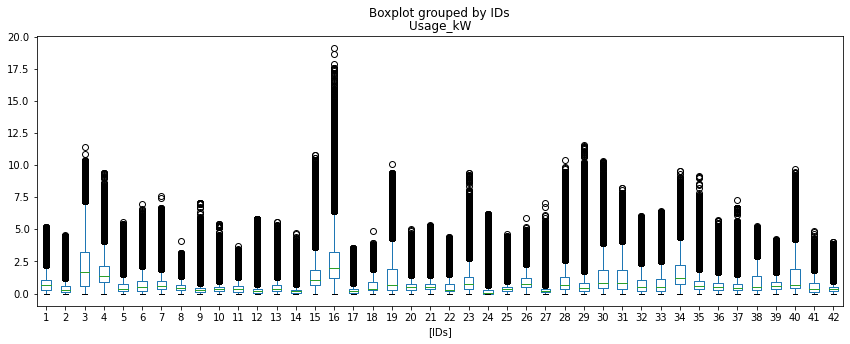

In [ ]:
boxplot = df.boxplot(column=['Usage_kW'],by=['IDs'],figsize=(14,5), grid=False,)


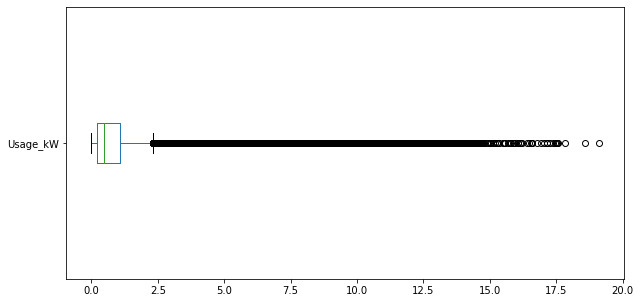

In [ ]:
boxplot = df.boxplot(column=['Usage_kW'],figsize=(10,5), grid=False,vert=False)

In [ ]:
# df.plot( x="Usage_kW",y="Month", kind="scatter")

In [ ]:
# from pandas.plotting import autocorrelation_plot
# plt.figure()
# autocorrelation_plot(df['Date_Time'])

In [ ]:
season = []
for i in df['Month']:
  if i == 1 or i==2 or i==12:
    season.append('Winter')
  elif i == 3 or i==4 or i==5:
    season.append('Spring')
  elif i == 6 or i== 7 or i== 8:
    season.append('Summer')
  elif i == 9 or i== 10 or i==11:
    season.append('Autumn')

df['Seasons'] = season
df.head()



,IDs,Date_Time,Usage_kW,Month,Seasons
0,31,2018-06-01 00:00:00,3.6729,6,Summer
1,31,2018-06-01 00:01:00,3.6762,6,Summer
2,31,2018-06-01 00:02:00,3.6814,6,Summer
3,31,2018-06-01 00:03:00,3.6780,6,Summer
4,31,2018-06-01 00:04:00,3.6530,6,Summer


Text(0.5, 1.0, 'Season wise Average consumption')

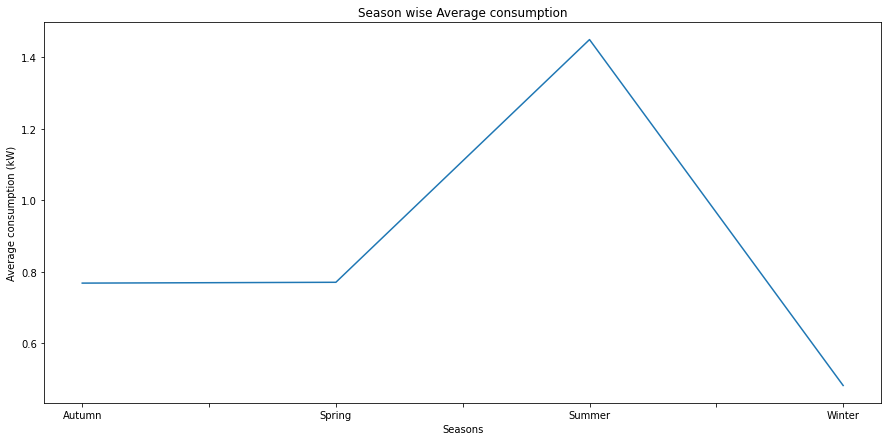

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Seasons']).mean()['Usage_kW'].plot(ax=ax)
ax.set_ylabel('Average consumption (kW)')
ax.set_title('Season wise Average consumption')

In [ ]:
ids = set(list((df['IDs'].unique())))

fig = go.Figure()
for i in ids: 
  data = df[df['IDs']==i]
  x=data.groupby(['Seasons'])['Usage_kW'].sum()
  
  fig.add_trace(go.Scatter(x=x.index, y=x.values,
                      mode='lines',
                      name='ID'+str(i)))

fig.update_layout(
    title="Usage vs Seasons for each consumer",
    xaxis_title="Seasons",
    yaxis_title="Usage (kW)",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show()

In [ ]:
# (Done) Fill null values with 0 since all the null values were in Usage_kw
# number of houses - 42
# granuality -
# How much  Data for each house - on average (525600 data)
# Plot average of each house to see the trend ((months vs averaga of all houses in that month) or (IDs vs the average of that house))
# plot data of each house indivdually (line graphs (months vs the usage))
# See precon paper to check what else can be mentioned.
# box plot for the usage
# Group by months and make scatter plots  to see usage of electricity in specific months 
# scatter points wrt season as well. 